# Classification
This is a practical on the two-class classification problem.
Within this practical you will:
- Generate synthetic training and test datasets
- Apply different classification models to the data and evalute their performance
- Use the scikit-learn library for simple two-class classification problems

## Loading required libraries
We will use numpy and matplotlib for data generation, manipulation and visualization.
Scikit-learn is the library we will use to solve our regression problem

In [1]:
import numpy as num
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

## Data Generation
We first define a set of utility function that will help us in generating the data

In [2]:
def gen_data_classification(r_min,r_max,c_dist,n_points,noise_lev):
    c_x=c_dist/2*num.cos(num.pi/4)
    c_y=c_dist/2*num.sin(num.pi/4)
    X_cls1, Y_cls1=gen_data_circle(-c_x, -c_y,r_min,r_max,n_points,noise_lev,1)
    X_cls0, Y_cls0=gen_data_circle(c_x, c_y,r_min,r_max,n_points,noise_lev,0)
    X_train, Y_train, X_test, Y_test=gen_data_class(X_cls1,Y_cls1,X_cls0,Y_cls0)
    return X_train, Y_train, X_test, Y_test

def gen_data_class(X_cls1,Y_cls1,X_cls0,Y_cls0):
    X_train1, Y_train1, X_test1, Y_test1=training_test_split(X_cls1,Y_cls1,s_ratio=0.5)
    X_train0, Y_train0, X_test0, Y_test0=training_test_split(X_cls0,Y_cls0,s_ratio=0.5)
    X_train=num.hstack((X_train0,X_train1))
    Y_train=num.hstack((Y_train0,Y_train1))
    X_test=num.hstack((X_test0,X_test1))
    Y_test=num.hstack((Y_test0,Y_test1))
    return X_train, Y_train, X_test, Y_test

def gen_data_circle(c_x, c_y,r_min,r_max,n_points,noise_lev,cls=0):
    radius=r_min+num.random.rand(n_points)*(r_max-r_min)
    theta=num.random.rand(n_points)*(2*num.pi)
    x_obs=c_x+radius*num.cos(theta)
    y_obs=c_y+radius*num.sin(theta)
    x_obs=x_obs+gen_uncert(x_obs,noise_lev)
    y_obs=y_obs+gen_uncert(y_obs,noise_lev)
    X_obs=num.stack((x_obs,y_obs))
    if cls==0:
        Y_obs=num.ones(num.size(y_obs),dtype=int)
    else:
        Y_obs=num.zeros(num.size(y_obs),dtype=int)
    return X_obs, Y_obs

def gen_uncert(xy_obs,noise_lev):
    dn=noise_lev*((2*num.random.rand(num.size(xy_obs))-1)*num.mean(num.abs(xy_obs)))
    return dn

def randindx(data_size,split_size):
    ind_x=num.array([])
    while num.size(ind_x)<split_size:
        jndx=num.random.randint(0,data_size,size=split_size-num.size(ind_x))
        ind_x=num.concatenate((ind_x,num.unique(jndx)))
    ind_x=ind_x.astype(int)
    return ind_x

def training_test_split(X_obs,Y_obs,s_ratio=0.5):
    n_data=num.size(Y_obs)
    split_size=int(n_data*s_ratio)
    ind_x=randindx(n_data,split_size)
    X_train,Y_train=num.take(X_obs,ind_x,axis=1),num.take(Y_obs,ind_x,axis=0)
    X_test,Y_test=num.delete(X_obs,ind_x,axis=1),num.delete(Y_obs,ind_x,axis=0)
    return X_train, Y_train, X_test, Y_test
    


We use the function **gen_data** to generate our synthetic dataset

In [3]:
r_min=0
r_max=15
c_dist=50
n_points=1000
noise_lev=0.5
X_train, Y_train, X_test, Y_test=gen_data_classification(r_min,r_max,c_dist,n_points,noise_lev)

Let us split our data in *training* and *test* data and plot them

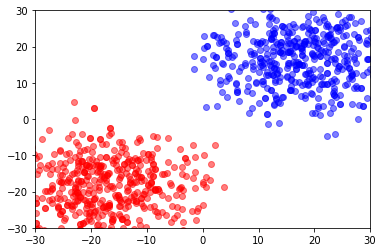

In [4]:
X_cl1=X_train[:,Y_train==1]
X_cl0=X_train[:,Y_train==0]
plt.plot(X_cl1[0,:], X_cl1[1,:],'bo',alpha=0.5)
plt.plot(X_cl0[0,:], X_cl0[1,:],'ro',alpha=0.5)
plt.xlim(-2*r_max, 2*r_max)
plt.ylim(-2*r_max, 2*r_max)
plt.show()

## Classification
Here we define the *classification* functions based on the following methods:
- LGS : Logistic Regression
- KNN : k-Nearest Neighbor
- SVM : Support Vector Machine
- MLP : Multi-Layer Perceptron

In [5]:
def classification(X_train, Y_train, method='LGS', *params):
    if method=='LGS':
        clf= LogisticRegression(C=params[0])
    elif method=='KNN':
        clf=KNeighborsClassifier(n_neighbors=params[0])
    elif method=='SVM':
        clf=svm.SVC(kernel='rbf')
    elif method=='MLP':
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(X_train.T, Y_train)
    x_min, x_max = -2*r_max, 2*r_max
    y_min, y_max = -2*r_max, 2*r_max
    hx = 0.1; hy = 0.1  # step size in the mes
    X, Y = num.meshgrid(num.arange(x_min, x_max+hx, hx), num.arange(y_min, y_max+hy, hy))
    Z = clf.predict(num.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)
    return X,Y,Z,clf

In [6]:
method='SVM'
param=1
X,Y,Z,clf=classification(X_train, Y_train, method, param)
print('Score training {:.2f}'.format(clf.score(X_train.T, Y_train)))
print('Score test     {:.2f}'.format(clf.score(X_test.T, Y_test)))

Score training 1.00
Score test     1.00


Plotting the results

(-30.0, 30.0)

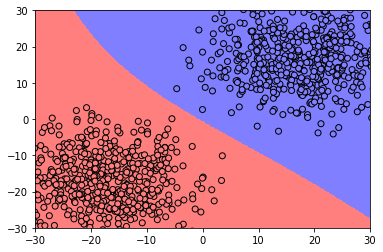

In [7]:
plt.figure()
cm_bright = ListedColormap(['#FF7F7F', '#7F7FFF'])
plt.pcolormesh(X, Y, Z, cmap=cm_bright, shading='auto')
plt.scatter(X_test[0,:], X_test[1,:], c=Y_test, edgecolors='k', cmap=cm_bright)
plt.xlim(-2*r_max, 2*r_max)
plt.ylim(-2*r_max, 2*r_max)
